In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import time

Bring in the crypto datasets.  These are the max historical data from Yahoo finance (e.g. https://finance.yahoo.com/quote/SOL-USD/history?p=SOL-USD)

In [2]:
ada = pd.read_csv('ADA-USD.csv', parse_dates=True, index_col=[0])
btc = pd.read_csv('BTC-USD.csv', parse_dates=True, index_col=[0])
doge = pd.read_csv('DOGE-USD.csv', parse_dates=True, index_col=[0])
eth = pd.read_csv('ETH-USD.csv', parse_dates=True, index_col=[0])
sol= pd.read_csv('SOL-USD.csv', parse_dates=True, index_col=[0])


We aren't expecting any missing values, so check all DataFrames for NaN

In [3]:
def PrintNanSummary(name, df, throwOnError = True):
    res = df.isnull().values.any()
    print("{} contains NaN values: {}".format(name, res))
    if res & throwOnError:
        raise ValueError("DataFrame contains NaN value")

PrintNanSummary('ADA', ada)
PrintNanSummary('BTC', btc)
PrintNanSummary('DOGE', doge)
PrintNanSummary('ETH', eth)
PrintNanSummary('SOL', sol)


ADA contains NaN values: False
BTC contains NaN values: False
DOGE contains NaN values: False
ETH contains NaN values: False
SOL contains NaN values: False


No dates should be missing, and there should only be a single value for every day.

In [4]:
def CheckDateRange(name, df, throwOnError = True):
    everyDay = pd.Series(data=pd.date_range(start=df.index.min(), end=df.index.max(), freq='D'))
    mask = everyDay.isin(df.index.values)
    hasMissingDays = everyDay[~mask].any()
    
    indexLength = len(df.index)
    indexLengthInDays = df.index.max() - df.index.min()
    indexLengthValid = (indexLengthInDays.days + 1) == indexLength

    everyDayPresentOnce = indexLengthValid & ~hasMissingDays

    print("Every day is present for {}: {}".format(name, everyDayPresentOnce))

    if throwOnError & ~everyDayPresentOnce:
        raise ValueError("DataFrame contains missing or repeated dates")        

CheckDateRange('ADA', ada)
CheckDateRange('BTC', btc)
CheckDateRange('DOGE', doge)
CheckDateRange('ETH', eth)
CheckDateRange('SOL', sol)

Every day is present for ADA: True
Every day is present for BTC: True
Every day is present for DOGE: True
Every day is present for ETH: True
Every day is present for SOL: True


Create a new column for each DataFrame that contains the daily close scaled to the maximum value for this column.  This will allow all the currencies to be plotted on the same y-axis

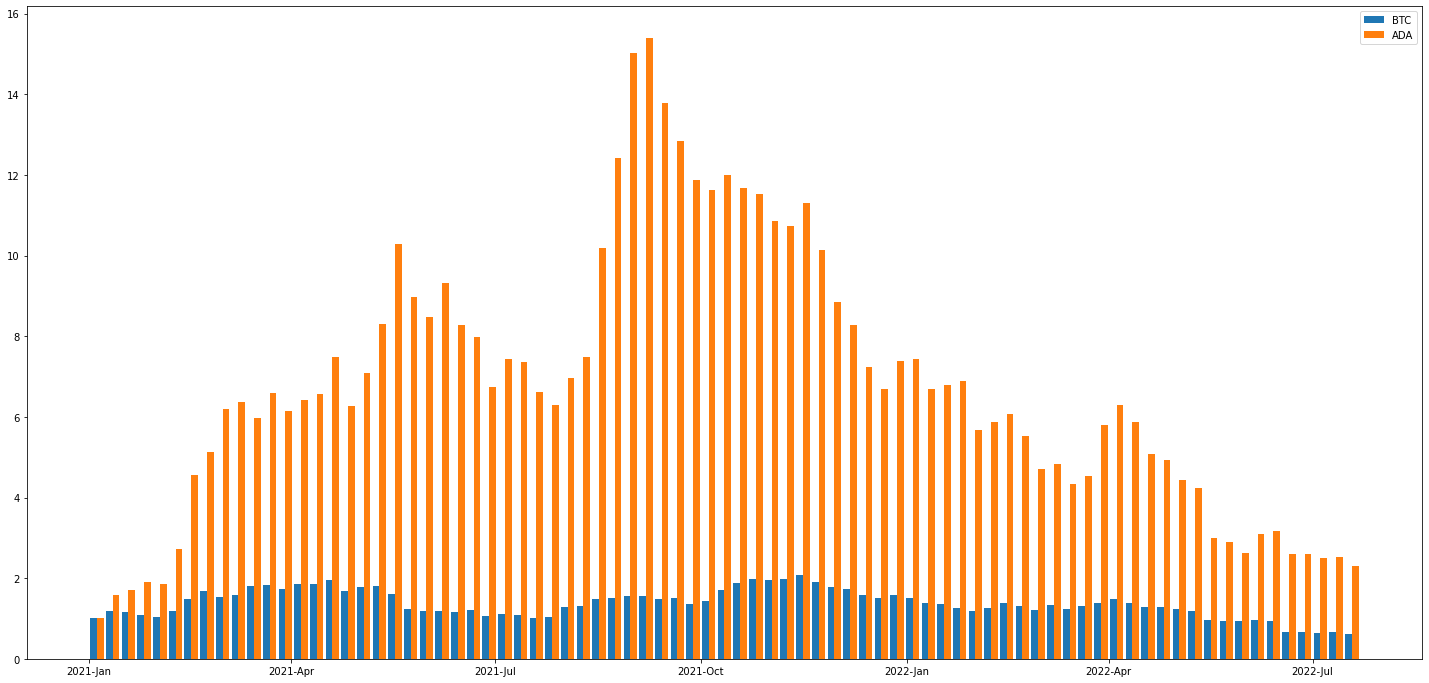

In [6]:
ada2021 = ada[ada.index >= '2021-01-01'].resample('W').mean()
btc2021 = btc[btc.index >= '2021-01-01'].resample('W').mean()
doge2021 = doge[doge.index >= '2021-01-01'].resample('W').mean()
eth2021 = eth[eth.index >= '2021-01-01'].resample('W').mean()
sol2021 = sol[sol.index >= '2021-01-01'].resample('W').mean()

def AddScaledClose(df):
    df['ScaledClose']= df.Close / df.Close.iloc[0] 


AddScaledClose(ada2021)
AddScaledClose(btc2021)
AddScaledClose(doge2021)
AddScaledClose(eth2021)
AddScaledClose(sol2021)


def PlotPairs(df1, df1Name, df2, df2Name, colName = 'ScaledClose'):
    width=3
    shift = pd.to_timedelta('3D')
    fig, ax = plt.subplots(figsize=(25,12))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,3)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

    ax.bar(df1.index, df1[colName], label=df1Name, width=width)
    ax.bar(df2.index+shift, df2[colName], label=df2Name, width=width)

    plt.legend()
    plt.show()

PlotPairs(btc2021, 'BTC', ada2021, 'ADA')

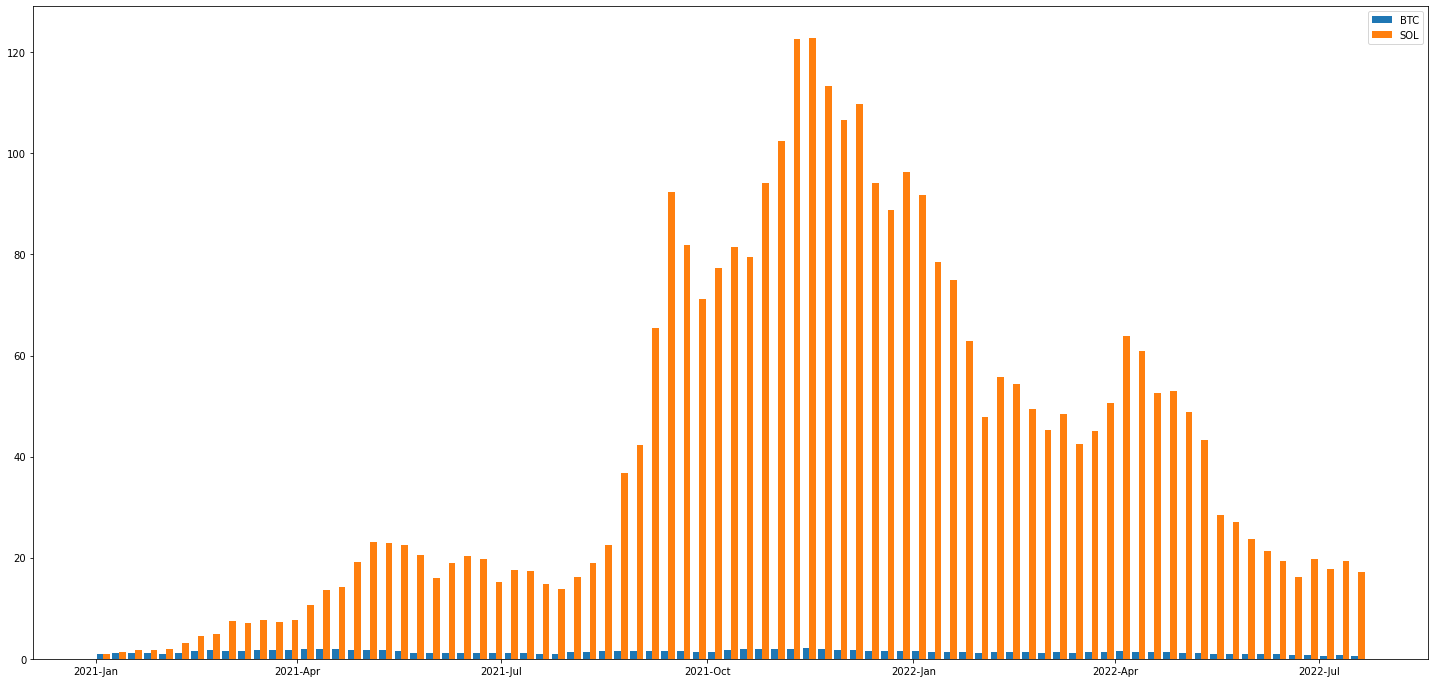

In [7]:
PlotPairs(btc2021, 'BTC', sol2021, 'SOL')